In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Pre-Proccessing

In [23]:
covid = pd.read_csv("covid_worldwide.csv")
covid.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [24]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


In [25]:
covid.dropna(inplace=True)

labels = ["Total Cases", "Total Deaths", "Total Recovered",
          "Active Cases", "Total Test", "Population"]

for feature in labels:
    covid[feature] =(
        covid[feature]
        .str.replace(",", "")
        .astype(int)
    )

covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 224
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    195 non-null    int64 
 1   Country          195 non-null    object
 2   Total Cases      195 non-null    int64 
 3   Total Deaths     195 non-null    int64 
 4   Total Recovered  195 non-null    int64 
 5   Active Cases     195 non-null    int64 
 6   Total Test       195 non-null    int64 
 7   Population       195 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 13.7+ KB


## EDA

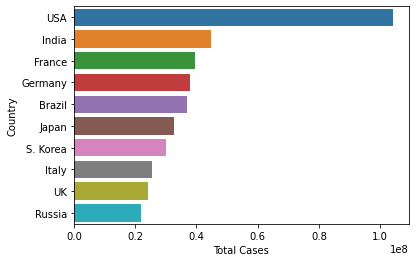

In [32]:
sns.barplot(
    data=covid[["Country", "Total Cases"]].head(10),
    x="Total Cases",
    y="Country"
);

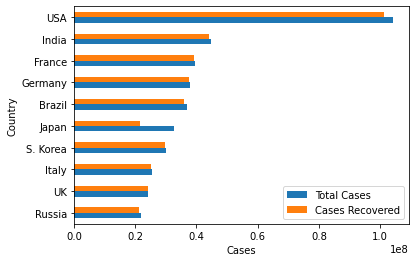

In [65]:
country_recovered = covid[["Country", "Total Cases", "Total Recovered"]].iloc[:10]

(country_recovered
    .sort_values("Total Cases")
    .plot(x='Country', kind='barh')
)

plt.xlabel("Cases")
plt.ylabel("Country")

plt.legend(['Total Cases', 'Cases Recovered'])

plt.show()

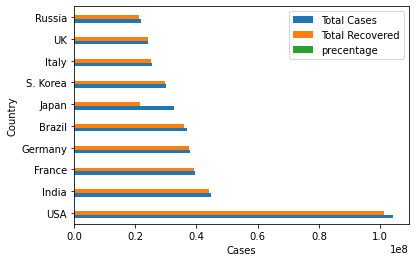

In [72]:
country_recovered["precentage"] = ((country_recovered["Total Recovered"] / country_recovered["Total Cases"]) * 100)
country_recovered.plot(x='Country', kind='barh')


plt.xlabel("Cases")
plt.ylabel("Country")

plt.show()